# Lecture 03 - Toy Problem, Linear Regression, Logistic Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Elementary Data Problem

### Data From Your 100 Friends

In [2]:
socks=np.random.randint(1, 10, 100)
pants=np.random.randint(1, 10, 100)
other_impact=np.random.randn(100)
cost=23.0*pants+5.0*socks+2.0*other_impact
X=np.column_stack((socks, pants, other_impact, cost))

### Visualization Cost v.s. Pants

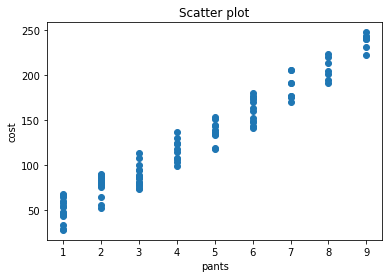

In [3]:
plt.scatter(X[:,1], X[:,3])
plt.title('Scatter plot')
plt.xlabel('pants')
plt.ylabel('cost')
plt.show()

### Visualization Cost v.s. Socks

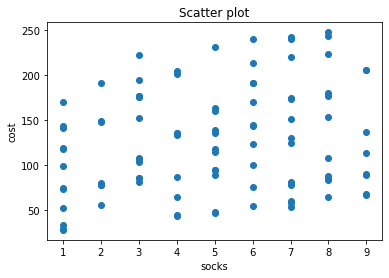

In [4]:
plt.scatter(X[:,0], X[:,3])
plt.title('Scatter plot')
plt.xlabel('socks')
plt.ylabel('cost')
plt.show()

## Linear Regression
\begin{equation}
\beta_1=\frac{\frac{1}{n}\sum\limits_{i=1}^{n}y^{i}x^{i}-\bar{y}\bar{x}}{{\frac{1}{n}\sum\limits_{i=1}^{n}x^{i}x^{i}}-\bar{x}\bar{x}}=\frac{Cov(X,Y)}{Var(X)}=\rho_{XY}\frac{\sigma_X}{\sigma_Y}
\end{equation}
\begin{equation}
{\beta_0}=(\bar{y}-\beta_1\bar{x})
\end{equation}


In [5]:
Y=X[:, 3]
X1d=X[:, 1]

In [6]:
print(np.matmul(X1d-np.mean(X1d), Y.T-np.mean(Y))/99) #Unbiased estimation of Cov(X,Y)
print(np.matmul(X1d-np.mean(X1d), Y.T-np.mean(Y))/100) #Biased estimation of Cov(X,Y)

144.5040661052479
143.05902544419538


In [7]:
print (np.cov(X1d, Y, bias=True)[0][1]/(np.std(X1d)*np.std(Y)))

0.9774875415301952


#### Calculate the correlation coeffcient $\rho_{XY}$

In [8]:
print (np.corrcoef(X1d, Y)[0][1])

0.9774875415301955


#### Calculate the correlation coefficient $\rho_{XY}\frac{\sigma_X}{\sigma_Y}$

In [9]:
print(np.corrcoef(X1d, Y)[0][1]*np.std(Y)/np.std(X1d))

22.964399872254297


In [10]:
X1d.shape

(100,)

In [11]:
X1d.reshape((100,1)).shape

(100, 1)

In [12]:
from sklearn.linear_model import LinearRegression

In [14]:
reg = LinearRegression().fit(X1d.reshape((100,1)), Y.reshape((100,1)))
print ([reg.coef_, reg.intercept_])

[array([[22.96439987]]), array([25.35217024])]


## Multivariate Linear Regression

In [ ]:
reg = LinearRegression().fit(X[:,(0,1)], Y.reshape((100,1)))
print [reg.coef_, reg.intercept_]

## Multivariate Linear Regression from Scratch

Recall the LM algorithm: $\beta=({X^T}{X})^{-1}{X^{T}}{y}$

In [ ]:
X2d=X[:, (0,1)]
print X2d.shape

In [ ]:
X2d=np.column_stack([X2d, np.repeat(1, 100)])

In [ ]:
Y.shape

In [ ]:
y=Y.reshape((100,1))

In [ ]:
y.shape

In [ ]:
print X2d.shape
print y.shape
print np.matmul(np.matmul(np.linalg.inv(np.matmul(X2d.T, X2d)), X2d.T), y)

## Logistic Regression

## Data 

In [ ]:
X1 = 2*np.random.randn(1, 5000)
X2 = 5*np.random.randn(1, 5000)
X3 = np.random.randn(1, 5000)
eta=0.5*X1+0.1*X2+1.56*X3-1
X=np.column_stack([X1.T,X2.T, X3.T])
p=1/(1+np.exp(-eta))
y=np.random.binomial(1, p).reshape(5000,1)

In [ ]:
print(X)

In [ ]:
np.unique(y)

In [ ]:
plt.scatter(X[:,1], y)
plt.title('Scatter plot')
plt.xlabel('X2')
plt.ylabel('Label')
plt.show()

## Logistic Regression using sklearn

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr=LogisticRegression(penalty='none', solver='newton-cg')

In [11]:
reg=lr.fit(X,y.reshape(y.size))

In [12]:
print([reg.coef_, reg.intercept_])

[array([[0.5014984 , 0.09276433, 1.46077006]]), array([-1.01573885])]


## Logistic Regression from Scratch

#### Hessian Matrix:
\begin{align*}
{{H}}={-X^TWX}, {W}=  
\begin{bmatrix}
   {p_1 (1-p_1)} & & \\
    & \ddots & \\
    & & {p_n (1-p_n)}
  \end{bmatrix}
\end{align*}

#### Iteratively Re-Weighted Least Squares
\begin{align*}
{\vec{\beta}^{(k+1)}} &\leftarrow {\vec{\beta}^{(k)}+({X}^T{W}{X})^{-1}{X}^T({y}-{p})}
\end{align*}

In [13]:
X_ext=np.column_stack([X, np.repeat(1, 5000)]) #Create matrix with constant column

In [14]:
print(X_ext)

[[-2.1106959  -3.0694213   0.04760168  1.        ]
 [ 0.91652066 -2.33899694  0.34010414  1.        ]
 [ 1.47673038 -1.31581589 -0.20031893  1.        ]
 ...
 [-2.65224468  5.04564179  0.09837804  1.        ]
 [-1.46124381 -4.42339098  0.06089812  1.        ]
 [-0.55142608 -8.21051887  1.13294076  1.        ]]


In [15]:
beta = np.array([0.2, 0.1, 0.1, 0.1]).reshape(-1, 1) # Initialize beta

In [16]:
print(beta)

[[0.2]
 [0.1]
 [0.1]
 [0.1]]


#### initialize the update value (set to be 1) for every iteration i.e.
$\Delta\beta=({X}^T{W}{X})^{-1}{X}^T({y}-{p})$


In [17]:
Deltabeta= np.array([0.1, 0.1, 0.1, 0.1]).reshape(-1, 1)

In [19]:
while np.max(np.abs(Deltabeta))>1e-15:
    p=1/(1+np.exp(-np.matmul(X_ext, beta)))
    W=np.diag(np.multiply(p,(1-p))[:,0])
    XtY=np.matmul(X_ext.T, (y-p))
    XtWX=np.matmul(np.matmul(X_ext.T, W), X_ext)
    Deltabeta=np.matmul(np.linalg.inv(XtWX), XtY)
    beta=np.add(beta, Deltabeta)
print(beta.T)

[[ 0.5014984   0.09276433  1.46077006 -1.01573885]]


In [39]:
1/(1+np.exp(-np.dot(beta.T, X_ext[0])))

array([0.09200072])

In [43]:
reg.predict_proba(X)

array([[0.90799928, 0.09200072],
       [0.56863073, 0.43136927],
       [0.66593169, 0.33406831],
       ...,
       [0.84993254, 0.15006746],
       [0.8879455 , 0.1120545 ],
       [0.59843668, 0.40156332]])

In [44]:
reg.predict(X[0:10,:]) 

array([0, 0, 0, 0, 1, 1, 0, 1, 0, 0])

In [33]:
X_ext[0:1]

array([[-2.1106959 , -3.0694213 ,  0.04760168,  1.        ]])

array([-2.28944717])

In [21]:
X[0:10,:]

array([[-2.1106959 , -3.0694213 ,  0.04760168]])

In [24]:
y[0:10]

array([[0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1]])

In [ ]:
y[10:20]

In [ ]:
reg.predict_proba(X[1:2,:]) 